In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
df["Class"].value_counts(normalize=True)*100

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_9744\4075962424.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class',data=df,palette={'0': 'green', '1': 'red'})


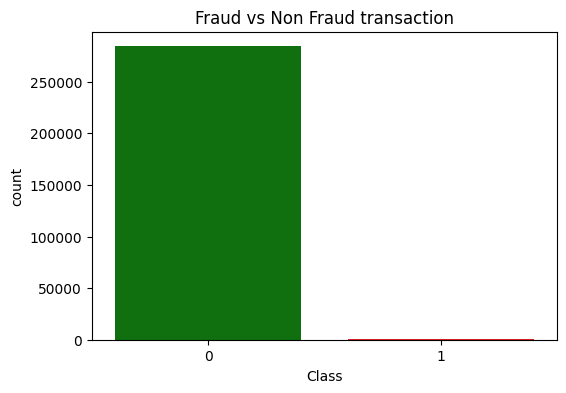

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df,palette={'0': 'green', '1': 'red'})
plt.title("Fraud vs Non Fraud transaction")
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9744\3625548599.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette={'0': 'lightblue', '1': 'orange'})


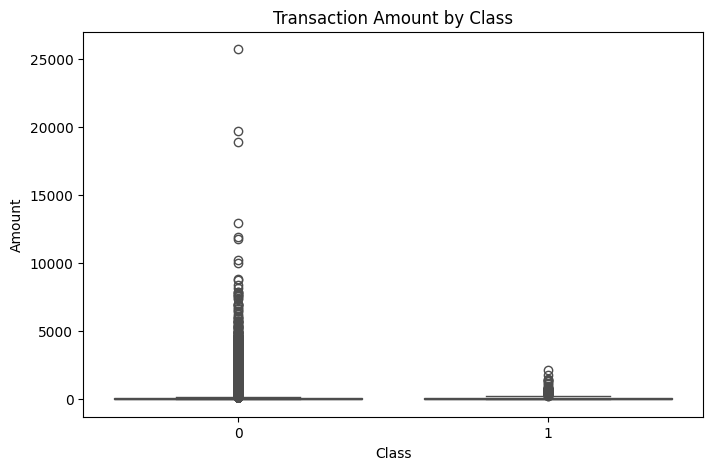

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Amount', data=df, palette={'0': 'lightblue', '1': 'orange'})
plt.title("Transaction Amount by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_9744\3364404858.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class',y='Time',data=df,palette={'0':'yellow','1':'blue'})


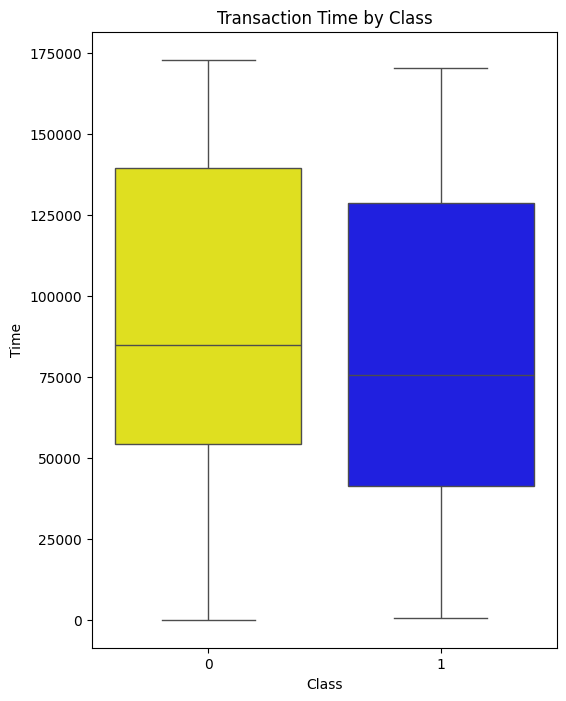

In [11]:
plt.figure(figsize=(6,8))
sns.boxplot(x='Class',y='Time',data=df,palette={'0':'yellow','1':'blue'})
plt.title("Transaction Time by Class")
plt.xlabel("Class")
plt.ylabel("Time")
plt.show()           

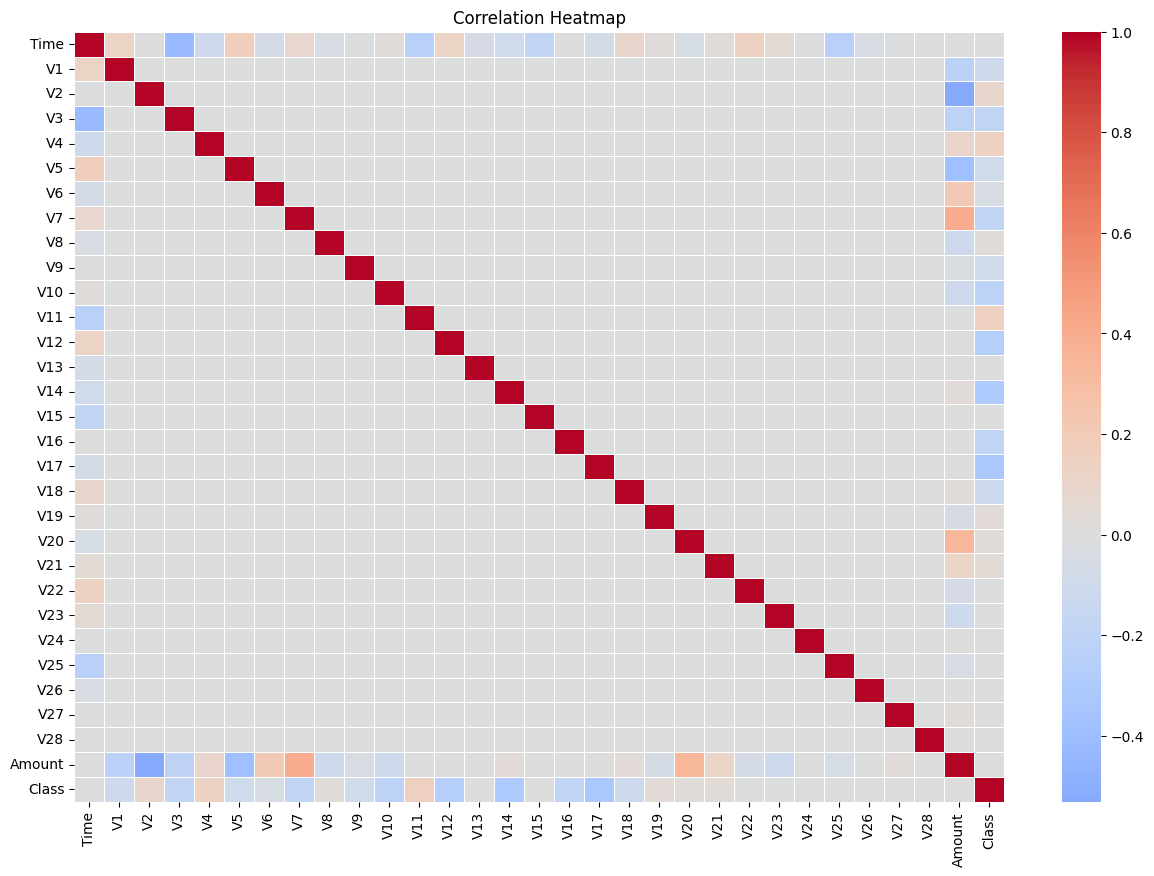

In [12]:
plt.figure(figsize=(15,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
from sklearn.preprocessing import StandardScaler

# Check if 'Amount' and 'Time' exist in the DataFrame
if 'Amount' in df.columns and 'Time' in df.columns:
    # Initialize StandardScaler
    scaler = StandardScaler()

    # Scale Amount and Time
    df['scaled_amount'] = scaler.fit_transform(df[['Amount']])
    df['scaled_time'] = scaler.fit_transform(df[['Time']])

    # Drop original Time and Amount columns
    df = df.drop(['Time', 'Amount'], axis=1)

    # Rearranging the columns (optional)
    scaled_features = ['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount', 'Class']] + ['Class']
    df = df[scaled_features]

    # Check the first few rows
    print(df.head())
else:
    print("Columns 'Amount' and/or 'Time' are missing.")



   scaled_time  scaled_amount        V1        V2        V3        V4  \
0    -1.996583       0.244964 -1.359807 -0.072781  2.536347  1.378155   
1    -1.996583      -0.342475  1.191857  0.266151  0.166480  0.448154   
2    -1.996562       1.160686 -1.358354 -1.340163  1.773209  0.379780   
3    -1.996562       0.140534 -0.966272 -0.185226  1.792993 -0.863291   
4    -1.996541      -0.073403 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  Class  
0 -0.1104

In [14]:
df.columns

Index(['scaled_time', 'scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
       'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'Class'],
      dtype='object')

In [15]:
# Check if 'scaled_Amount' and 'scaled_Time' exist in the DataFrame
if 'scaled_Amount' in df.columns and 'scaled_Time' in df.columns:
    # Rearranging the columns (optional)
    scaled_features = ['scaled_Time', 'scaled_Amount'] + [col for col in df.columns if col not in ['scaled_Time', 'scaled_Amount', 'Class']] + ['Class']
    df = df[scaled_features]

    # Check the first few rows
    print(df.head())
else:
    print("Columns 'scaled_Amount' and/or 'scaled_Time' are missing.")


Columns 'scaled_Amount' and/or 'scaled_Time' are missing.


In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE, class distribution:")
print(pd.Series(y_train_sm).value_counts())


After SMOTE, class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluationw
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC Score for Random forest:", roc_auc_score(y_test, y_proba))


[[56850    14]
 [   17    81]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.83      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score for Random forest: 0.968302458856362


In [18]:
import xgboost as xgb
from sklearn.metrics import roc_curve,roc_auc_score
xgb_model=xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss',random_state=42)
xgb_model.fit(X_train_sm,y_train_sm)
xgb_probs=xgb_model.predict_proba(X_test)[:,1]
xgb_y_pred = xgb_model.predict(X_test)

# Print confusion matrix and classification report for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_y_pred))
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_y_pred))

# Calculate ROC curve and AUC
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

# Print AUC
print("XGBoost AUC:", xgb_auc)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:40:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Confusion Matrix:
[[56831    33]
 [   14    84]]

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

XGBoost AUC: 0.980715714113445


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)
lr_preds = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)[:, 1]  
print("Logistic Regression - Confusion Matrix")
print(confusion_matrix(y_test, lr_preds))
print("\nLogistic Regression - Classification Report")
print(classification_report(y_test, lr_preds))

Logistic Regression - Confusion Matrix
[[55406  1458]
 [    8    90]]

Logistic Regression - Classification Report
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



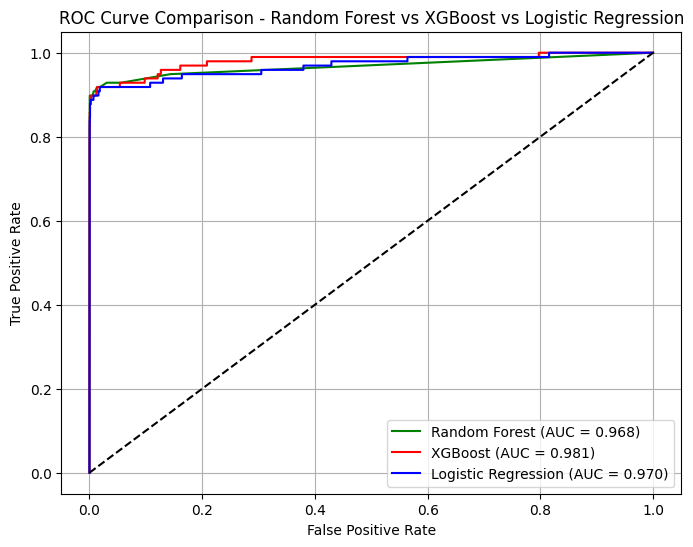

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate FPR and TPR
rf_fpr, rf_tpr, _ = roc_curve(y_test, y_proba)       # Random Forest
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)    # XGBoost
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)       # Logistic Regression

# Calculate AUC
rf_auc = roc_auc_score(y_test, y_proba)
xgb_auc = roc_auc_score(y_test, xgb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})', color='green')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})', color='red')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Random Forest vs XGBoost vs Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

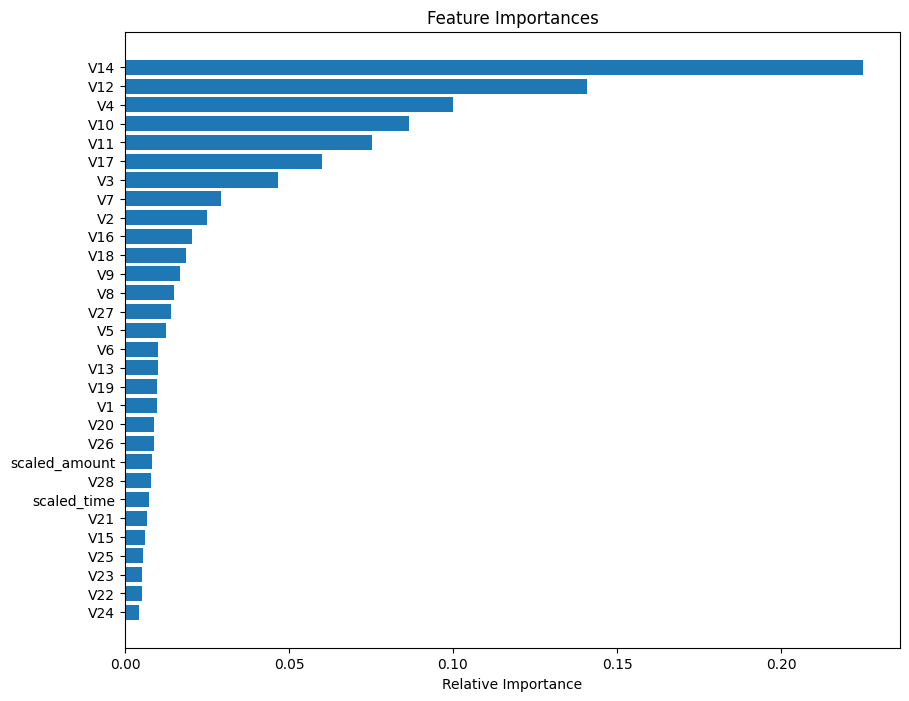

In [21]:
import numpy as np

# Feature importance plot
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [22]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import numpy as np

# Train Isolation Forest (no labels needed)
iso_model = IsolationForest(contamination=0.0017, random_state=42)  # contamination ≈ % of fraud in original data
iso_model.fit(X_train)

# Predict anomaly scores on test set
iso_scores = iso_model.decision_function(X_test)  # Higher = more normal, lower = more anomalous
iso_anomaly_scores = -iso_scores  # Flip: higher = more likely fraud

# Predict binary anomaly labels
iso_preds = iso_model.predict(X_test)  # -1 = anomaly, 1 = normal
iso_preds = np.where(iso_preds == -1, 1, 0)  # Convert to match fraud labels (1 = fraud)

# Evaluation
print("Isolation Forest Confusion Matrix:")
print(confusion_matrix(y_test, iso_preds))
print("\nIsolation Forest Classification Report:")
print(classification_report(y_test, iso_preds))

# ROC-AUC using anomaly scores
iso_auc = roc_auc_score(y_test, iso_anomaly_scores)
print("Isolation Forest AUC:", iso_auc)


Isolation Forest Confusion Matrix:
[[56791    73]
 [   65    33]]

Isolation Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.34      0.32        98

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.66     56962
weighted avg       1.00      1.00      1.00     56962

Isolation Forest AUC: 0.9601674026391649


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt

input_dim = X_train.shape[1]
input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(encoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')

history = autoencoder.fit(X_train_sm, X_train_sm,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)

reconstructions = autoencoder.predict(X_test)
reconstruction_error = tf.keras.losses.mse(X_test, reconstructions).numpy()

threshold = np.percentile(reconstruction_error, 95)
autoencoder_preds = (reconstruction_error > threshold).astype(int)

print("Autoencoder Confusion Matrix:")
print(confusion_matrix(y_test, autoencoder_preds))
print("\nAutoencoder Classification Report:")
print(classification_report(y_test, autoencoder_preds))

autoencoder_auc = roc_auc_score(y_test, reconstruction_error)
print("Autoencoder AUC:", autoencoder_auc)

Epoch 1/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 3.3474 - val_loss: 0.6177
Epoch 2/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5488 - val_loss: 0.5054
Epoch 3/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4640 - val_loss: 0.4781
Epoch 4/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4375 - val_loss: 0.4557
Epoch 5/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4221 - val_loss: 0.4393
Epoch 6/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4116 - val_loss: 0.4272
Epoch 7/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4023 - val_loss: 0.4164
Epoch 8/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3971 - val_loss: 0.4084
Epoch 9/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3904 - val_loss: 0.4016
Epoch 10/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3833 - val_loss: 0.3908
Epoch 11/20
1777/1777 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3782 - val_loss: 0.3850
Epoch 12/20
1777/1777 ━━━━━━━━